In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!mkdir ./.kaggle
import json
token = {"username":"e211097","key":"d1cbc0614124c60ed9eca762e87944cb"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json

!wget https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
!unzip cell_images.zip

# Importing libraries and define data path

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
np.random.seed(1000)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import keras
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.optimizers import SGD

import os
import cv2
from PIL import Image


ORIGIN_PATH=os.getcwd()
path = os.path.abspath("cell_images")

SIZE = 64
dataset = []
label = []
DATA_class1=os.path.join(path,"Parasitized")
DATA_class2 = os.path.join(path,"Uninfected")

# TRAINING_GENERATOR_PATH = os.path.abspath("MalariaTrainData")
# TESTING_GENERATOR_PATH = os.path.abspath("MalariaTestData")

Using TensorFlow backend.


## Read images and define a label for each image

In [2]:
from skimage.io import imread

parasitized_images = os.listdir(DATA_class1)

for i, image_name in enumerate(parasitized_images):
    try:

        
        image_path=os.path.join(DATA_class1,image_name)
        image = cv2.imread(image_path)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))
        

Could not read image 13779 with name Thumbs.db


## Images display 

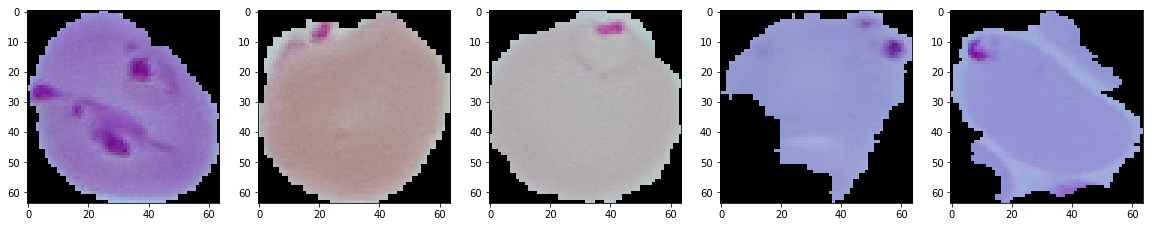

In [3]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(parasitized_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[image_index])

In [4]:

Uninfected_images = os.listdir(DATA_class2)

for i, image_name in enumerate(Uninfected_images):
    try:

        
        image_path=os.path.join(DATA_class2,image_name)
        image = cv2.imread(image_path)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

Could not read image 13779 with name Thumbs.db


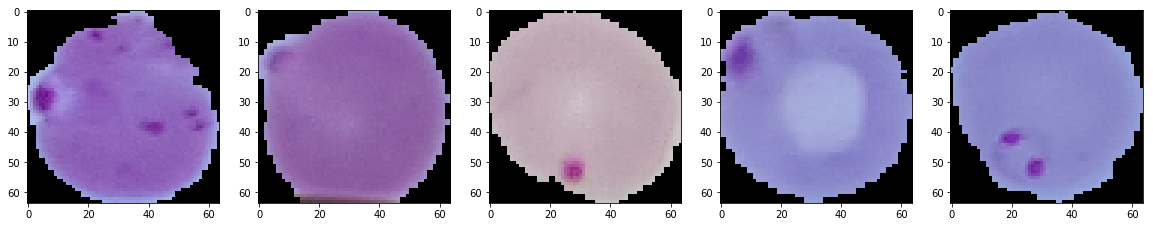

In [5]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(Uninfected_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[image_index])

In [6]:
image_data = np.array(dataset)
label = np.array(label)

In [7]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
label = label[idx]

In [8]:
image_data.shape

(27558, 64, 64, 3)

# CNN model

##### after some research i choose the following structure which is performing better 

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD

height = 64
width = 64
classes = 2
channels = 3
chanDim = -1

    
inputShape = (height, width, channels)
chanDim = -1
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = chanDim))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = chanDim))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = chanDim))
model.add(Dropout(0.2))

model.add(Flatten())
    
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization(axis = chanDim))
model.add(Dropout(0.5))
model.add(Dense(classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxP

## Fitting the model

In [10]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_data, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)


h = model.fit(X_train, y_train, epochs = 20, batch_size = 32)


Instructions for updating:
Use tf.cast instead.
Epoch 1/20
22046/22046 [==============================] - 163s 7ms/step - loss: 0.5219 - acc: 0.7850
Epoch 2/20
22046/22046 [==============================] - 151s 7ms/step - loss: 0.2202 - acc: 0.9218
Epoch 3/20
22046/22046 [==============================] - 181s 8ms/step - loss: 0.1834 - acc: 0.9369
Epoch 4/20
22046/22046 [==============================] - 179s 8ms/step - loss: 0.1682 - acc: 0.9426
Epoch 5/20
22046/22046 [==============================] - 174s 8ms/step - loss: 0.1604 - acc: 0.9464
Epoch 6/20
22046/22046 [==============================] - 143s 6ms/step - loss: 0.1549 - acc: 0.9480
Epoch 7/20
22046/22046 [==============================] - 143s 6ms/step - loss: 0.1515 - acc: 0.9482
Epoch 8/20
22046/22046 [==============================] - 141s 6ms/step - loss: 0.1467 - acc: 0.9512
Epoch 9/20
22046/22046 [==============================] - 144s 7ms/step - loss: 0.1429 - acc: 0.9520
Epoch 10/20
22046/22046 [==================

## Training accuracy and loss

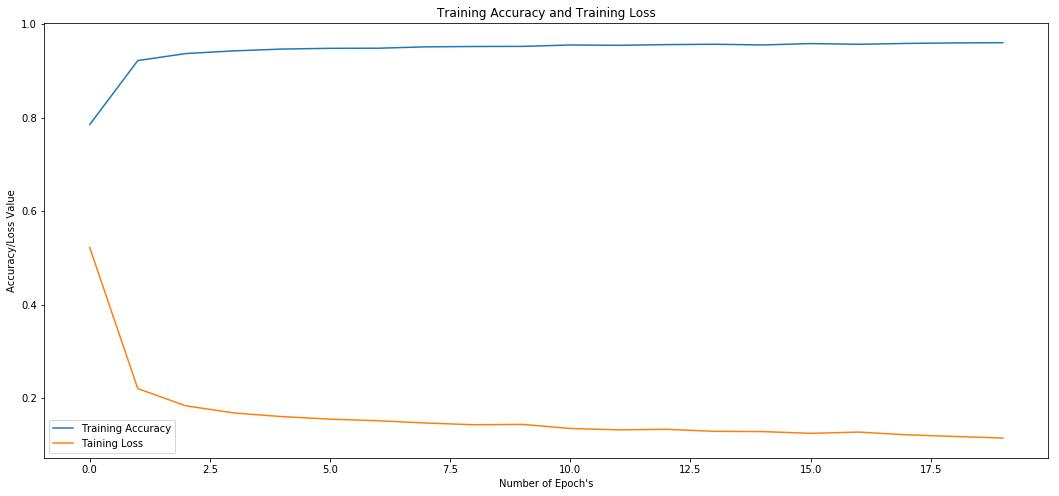

In [11]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['acc'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

# Evaluate the model

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1219219569392578
Test accuracy: 0.9582728592162555


# CNN with data augmentation

In [14]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(X_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(X_test, y_test, batch_size = 64, shuffle = False)

In [15]:
model1 = Sequential()
model1.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
model1.add(MaxPooling2D(2,2))
model1.add(BatchNormalization(axis = chanDim))
model1.add(Dropout(0.2))

model1.add(Conv2D(32, (3,3), activation = 'relu'))
model1.add(MaxPooling2D(2,2))
model1.add(BatchNormalization(axis = chanDim))
model1.add(Dropout(0.2))

model1.add(Conv2D(32, (3,3), activation = 'relu'))
model1.add(MaxPooling2D(2,2))
model1.add(BatchNormalization(axis = chanDim))
model1.add(Dropout(0.2))

model1.add(Flatten())
    
model1.add(Dense(512, activation = 'relu'))
model1.add(BatchNormalization(axis = chanDim))
model1.add(Dropout(0.5))
model1.add(Dense(classes, activation = 'softmax'))
model1.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 31, 31, 32)        128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 32)        128       
__________

In [17]:
from keras import optimizers
optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
model1.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])


In [18]:
h1 = model1.fit_generator(train_generator, steps_per_epoch = len(X_train) // 64, epochs = 10)

Epoch 1/10
344/344 [==============================] - 164s 477ms/step - loss: 0.7183 - acc: 0.6762
Epoch 2/10
344/344 [==============================] - 132s 383ms/step - loss: 0.3781 - acc: 0.8438
Epoch 3/10
344/344 [==============================] - 136s 395ms/step - loss: 0.3074 - acc: 0.8811
Epoch 4/10
344/344 [==============================] - 155s 450ms/step - loss: 0.2894 - acc: 0.8908
Epoch 5/10
344/344 [==============================] - 147s 427ms/step - loss: 0.2658 - acc: 0.9027
Epoch 6/10
344/344 [==============================] - 146s 425ms/step - loss: 0.2629 - acc: 0.9037
Epoch 7/10
344/344 [==============================] - 146s 425ms/step - loss: 0.2531 - acc: 0.9093
Epoch 8/10
344/344 [==============================] - 163s 473ms/step - loss: 0.2443 - acc: 0.9120
Epoch 9/10
344/344 [==============================] - 193s 561ms/step - loss: 0.2453 - acc: 0.9118
Epoch 10/10
344/344 [==============================] - 159s 463ms/step - loss: 0.2376 - acc: 0.9171


In [19]:
score = model1.evaluate_generator(val_generator, steps = 5)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15990439653396607
Test accuracy: 0.953125


# Pre build model (VGG16)

In [20]:
from keras.applications import VGG16



vgg16 = VGG16(weights = 'imagenet',include_top = False,input_shape = (96,96,3))
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0         
__________

In [21]:
for layers in vgg16.layers[:-4]:
    layers.trainable = False
model2 = Sequential()
model2.add(vgg16)
model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dense(1,activation = 'sigmoid'))

model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])    
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                294976    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 15,009,729
Trainable params: 7,374,465
Non-trainable params: 7,635,264
_________________________________________________________________


In [22]:
from keras.callbacks import ModelCheckpoint

callback = ModelCheckpoint('model_vgg16.h5',monitor='val_acc',mode = 'max',save_best_only=True)

calls = [callback]

In [23]:
augmentor = ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,validation_split=0.2)
train_generator = augmentor.flow_from_directory(path,batch_size=96,
                                                target_size = (96,96),class_mode = 'binary',subset = 'training')
test_generator = augmentor.flow_from_directory(path,batch_size=96,target_size=(96,96),
                                              class_mode='binary',subset='validation')




Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [25]:
history = model2.fit_generator(train_generator,
                              steps_per_epoch=10,
                              epochs=1,
                              callbacks = calls,
                              validation_data=test_generator,
                              validation_steps=64,
                              )

Epoch 1/1
10/10 [==============================] - 849s 85s/step - loss: 0.9311 - acc: 0.5406 - val_loss: 0.6537 - val_acc: 0.6977


In [26]:
score = model2.evaluate_generator(test_generator, steps = 5)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6517276763916016
Test accuracy: 0.7125


### taking into consideration that the model has been trained for one epoch only since it is taking much time. we can expect a better accuracy for more epoches 